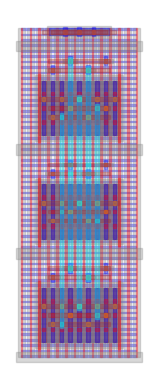

In [2]:
import numpy as np
from pex.ext_util import *
from visualizer.plot_funcs import *
# a = gdstk.read_gds("outputs/nmos_cm_.gds")
# a = gdstk.read_gds("outputs/other/nmos_cm_x.gds")
# a = gdstk.read_gds("outputs/nmos_cm_2x9_0.gds")
# a = gdstk.read_gds("outputs/nmos_dp_6x5_2.gds")
# a = gdstk.read_gds("outputs/five_transistor_ota.gds")
a = gdstk.read_gds("outputs/nmos_dp.gds")

a1 = a.cells[0]

fig, ax = plt.subplots()
show_gds(ax, a1)
plt.show()

In [3]:
polygons = get_polygons(a1)
nets = get_nets(polygons)    

0 s
2 d1
1 d0
3 g0
4 g1
5 b


9


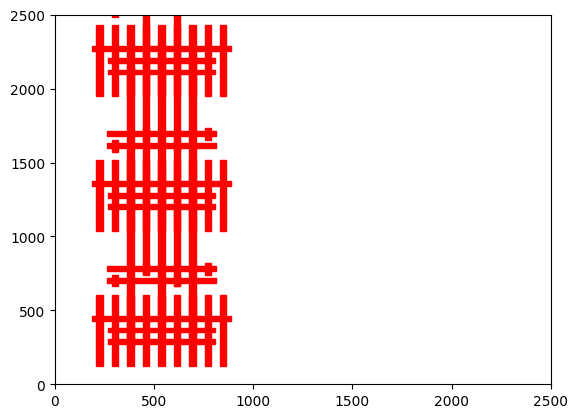

In [4]:
n = 0
for i in range(len(polygons["metal_2"])):
    for j in range(3):
# plot_polygons([polygons["metal_2"][i]]+[polygons["metal_3"][j]],xlim=[0,2000],ylim=[0,2000])
        if (are_they_connected(polygons["metal_2"][i],polygons["metal_3"][j],polygons["via_2"])):
            n+=1
print(n)
# plot_polygons(polygons["active_areas"],xlim=[0,2000],ylim=[0,2000])
plot_polygons(polygons["metal_1"]+polygons["metal_2"]+polygons["metal_3"],xlim=[0,2500],ylim=[0,2500])


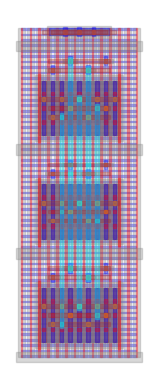

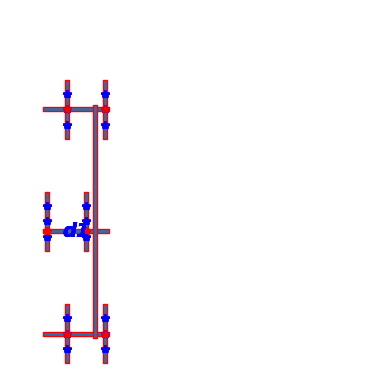

In [5]:

fig, ax = plt.subplots()
show_gds(ax, a1)
plt.show()

# # show_layouts(a1,fig_size=(2.5, 1.2))
# print(polygons["pins"][2].points)
# print(polygons["pins"][2].text)
# plot_polygons(polygons["metal_1"]+polygons["metal_2"]+polygons["metal_3"],xlim=[0,2000],ylim=[0,2000])
# print(a_a[0].points)
# plot_polygons(nets[2].metals, label=nets[2].label, xlim=[-500,2000],ylim=[-500,2000])
# plot_polygons(nets[1].metals, label=nets[1].label, xlim=[-500,2000],ylim=[-500,2000])
# plot_nets(nets,2800)

fig, ax = plt.subplots()
show_nets(ax,[nets[2]], size=3000)
plt.show()

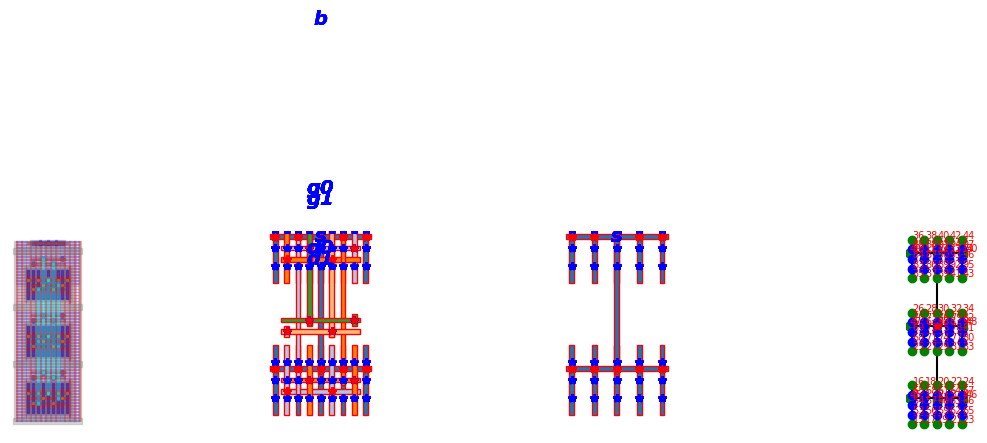

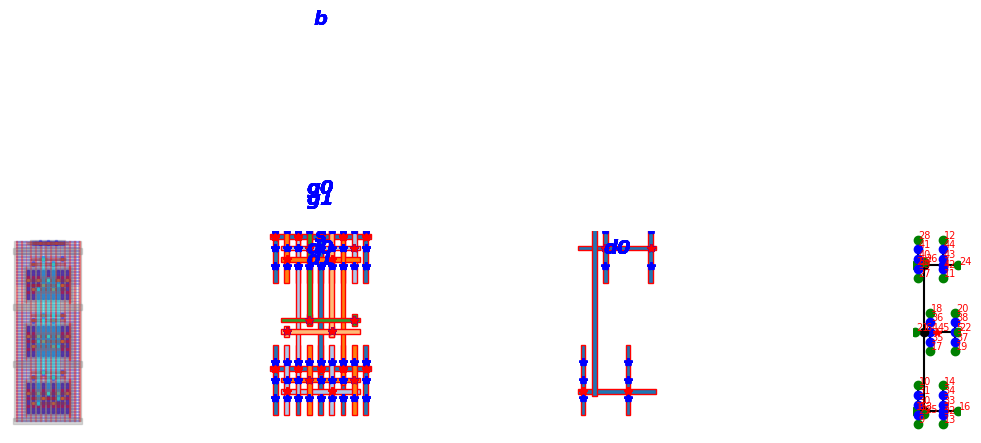

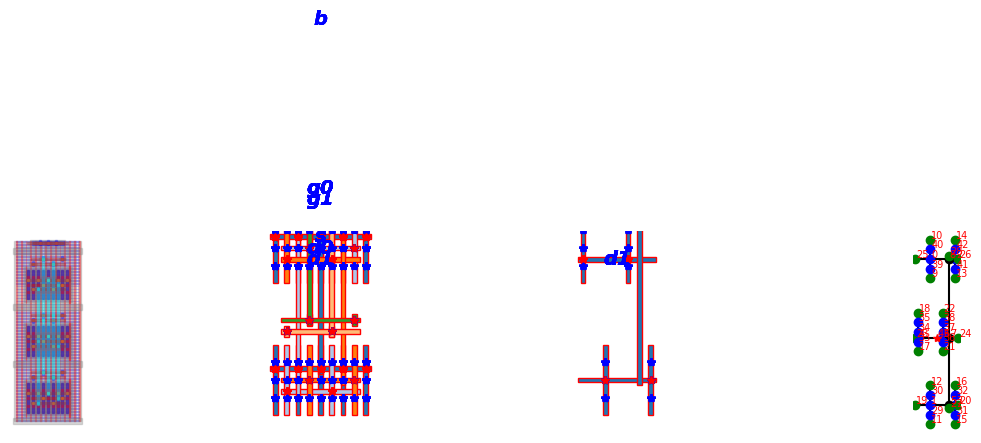

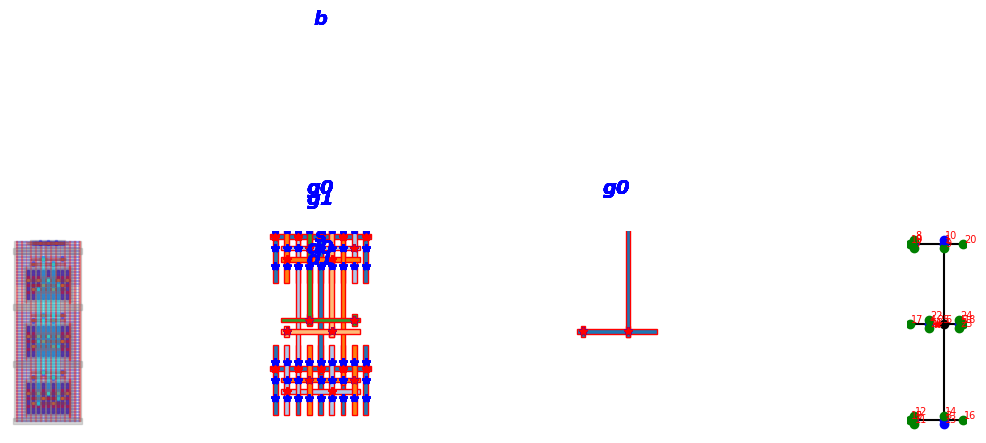

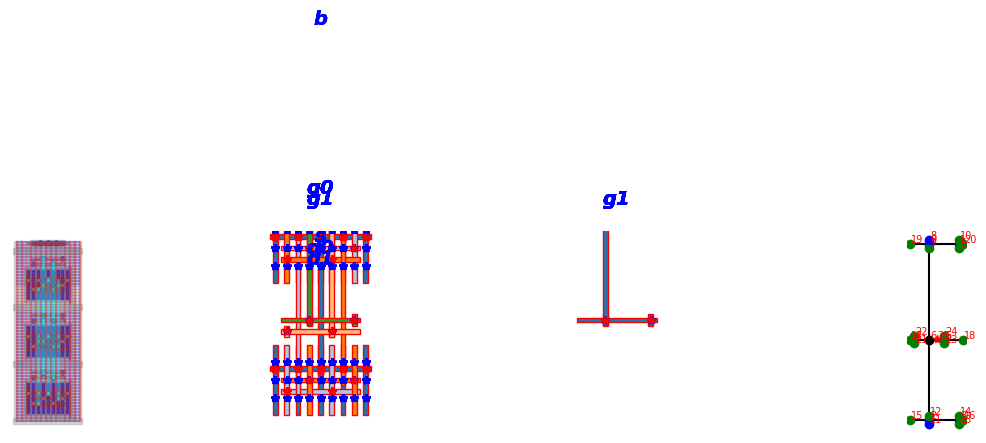

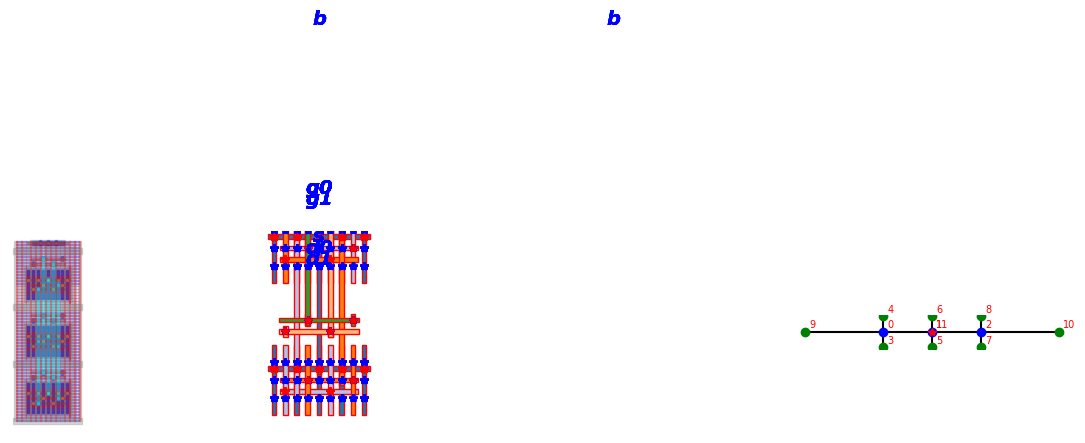

In [6]:
from pex.extract import *
for target_net in nets:
    js, _ = convert_net_to_stick(target_net, th1=50, th2=20) 
    nodes = find_all_nodes(js, target_net, node_reduction=True)

    fig, axes = plt.subplots(1, 4, figsize=(12, 4))  # Create a figure with 2 subplots
    show_gds(axes[0], a1)
    show_nets(axes[1], nets)
    show_nets(axes[2], [target_net])
    show_stk_nets(axes[3], js, nodes)
    plt.tight_layout()
    plt.show()
    # plt.savefig("pex/img_"+str(target_net.id[0])+".png")
    plt.close()

target_net = nets[2]
js, _ = convert_net_to_stick(target_net, th1=50, th2=20) 
nodes = find_all_nodes(js, target_net, node_reduction=True)

In [16]:
graph = np.empty_like(nodes)
for i, nd in enumerate(nodes):
    adj = adjacent_nodes(nd, nodes, js)
    graph[i] = adj
def dfs_iterative(graph, start):
    visited = set()
    stack = [start]
    res = []
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            neighbors = []
            for neighbor in graph[vertex]:
                if neighbor not in visited:
                    neighbors.append(neighbor)
            stack.extend(neighbors)
            res.append([vertex, neighbors])
            # stack.extend(neighbor for neighbor in graph[vertex] if neighbor not in visited)
    return res
label_index = 0
for i, nd in enumerate(nodes):
    if nd["t"] == "L":
        label_index = i
        break
nds = dfs_iterative(graph, label_index)

print(nds)

[[97, [15, 6, 12, 13]], [13, [87, 57, 10, 14]], [14, [88, 59, 38]], [38, []], [59, []], [88, [60]], [60, []], [10, [15, 6, 12]], [12, [86, 55, 11]], [11, [85, 53, 37]], [37, []], [53, []], [85, [54]], [54, []], [55, []], [86, [56]], [56, []], [6, [4, 7, 8]], [8, [83, 49, 9]], [9, [84, 51, 36]], [36, []], [51, []], [84, [52]], [52, []], [49, []], [83, [50]], [50, []], [7, [82, 47, 5]], [5, [81, 41, 35]], [35, []], [41, []], [81, [42]], [42, []], [47, []], [82, [48]], [48, []], [4, [45, 1, 2]], [2, [79, 29, 3]], [3, [80, 31, 34]], [34, []], [31, []], [80, [32]], [32, []], [29, []], [79, [30]], [30, []], [1, [78, 27, 0]], [0, [77, 25, 33]], [33, []], [25, []], [77, [26]], [26, []], [27, []], [78, [28]], [28, []], [45, []], [15, [20, 17, 18]], [18, [91, 65, 19]], [19, [92, 67, 40]], [40, []], [67, []], [92, [68]], [68, []], [65, []], [91, [66]], [66, []], [17, [90, 63, 16]], [16, [89, 61, 39]], [39, []], [61, []], [89, [62]], [62, []], [63, []], [90, [64]], [64, []], [20, [46, 22, 23]], [2

In [17]:
poly_counter = 0
diff_counter = 0

# giving ids for all polys and diffs
for n in nets:
    for poly in n.polys:
        poly.id = poly_counter

        for r in polygons["rvt"]:
            if are_they_connected(r, poly):
                poly.vt_box.append(r.id) 

        poly_counter += 1
    for diff in n.diffs:
        diff.id = diff_counter
        diff_counter += 1
   
# ------------------------------------------------
print("Polys")
for n in nets:
   for p in n.polys:
    print(p.id,f"{p.mid}  ", end=" ")

print("\nNets")
for n in nets:
   for d in n.diffs:
    print(d.id, end=" ")
# ------------------------------------------------

Polys
0 264.0   1 342.0   2 420.0   3 498.0   4 576.0   5 654.0   6 732.0   7 810.0   8 888.0   9 966.0   10 1044.0   11 1122.0   12 1200.0   13 1278.0   14 1356.0   15 1434.0   16 264.0   17 342.0   18 420.0   19 498.0   20 576.0   21 654.0   22 732.0   23 810.0   24 888.0   25 966.0   26 1044.0   27 1122.0   28 1200.0   29 1278.0   30 1356.0   31 1434.0   32 264.0   33 342.0   34 420.0   35 498.0   36 576.0   37 654.0   38 732.0   39 810.0   40 888.0   41 966.0   42 1044.0   43 1122.0   44 1200.0   45 1278.0   46 1356.0   47 1434.0   48 264.0   49 342.0   50 420.0   51 498.0   52 576.0   53 654.0   54 732.0   55 810.0   56 888.0   57 966.0   58 1044.0   59 1122.0   60 1200.0   61 1278.0   62 1356.0   63 1434.0   64 264.0   65 342.0   66 420.0   67 498.0   68 576.0   69 654.0   70 732.0   71 810.0   72 888.0   73 966.0   74 1044.0   75 1122.0   76 1200.0   77 1278.0   78 1356.0   79 1434.0   
Nets
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32

In [10]:
instances = {}  # np.empty([1,total_poly_no])
for n in nets:
    for poly in n.polys:
        vt_ind = poly.vt_box[0]
        vt_polygon = polygons["rvt"][vt_ind]
        r_point = [poly.mid + 78 / 2, vt_polygon.mid_point[1]]  # poly pitch/2
        l_point = [poly.mid - 78 / 2, vt_polygon.mid_point[1]]  # poly pitch/2
        # search for diffs
        instance_i = [-1, -1]
        for net in nets:
            for diff in net.diffs:
                # print(f"-- {l_point}, {diff.mid} --")
                if is_point_inside_the_polygon(l_point, diff):
                    instance_i[0] = diff.id
                if is_point_inside_the_polygon(r_point, diff):
                    instance_i[1] = diff.id
        
        instances[poly.id] = instance_i

# -------------------------------------------------
print(instances)
# -------------------------------------------------

{0: [0, 46], 1: [46, 1], 2: [1, 66], 3: [66, 2], 4: [2, 47], 5: [47, 3], 6: [3, 67], 7: [67, 4], 8: [4, 48], 9: [48, 5], 10: [5, 68], 11: [68, 6], 12: [6, 49], 13: [49, 7], 14: [7, 69], 15: [69, 8], 16: [9, 50], 17: [50, 10], 18: [10, 70], 19: [70, 11], 20: [11, 51], 21: [51, 12], 22: [12, 71], 23: [71, 13], 24: [13, 52], 25: [52, 14], 26: [14, 72], 27: [72, 15], 28: [15, 53], 29: [53, 16], 30: [16, 73], 31: [73, 17], 32: [18, 54], 33: [54, 19], 34: [19, 74], 35: [74, 20], 36: [20, 55], 37: [55, 21], 38: [21, 75], 39: [75, 22], 40: [22, 56], 41: [56, 23], 42: [23, 76], 43: [76, 24], 44: [24, 57], 45: [57, 25], 46: [25, 77], 47: [77, 26], 48: [27, 58], 49: [58, 28], 50: [28, 78], 51: [78, 29], 52: [29, 59], 53: [59, 30], 54: [30, 79], 55: [79, 31], 56: [31, 60], 57: [60, 32], 58: [32, 80], 59: [80, 33], 60: [33, 61], 61: [61, 34], 62: [34, 81], 63: [81, 35], 64: [37, 62], 65: [62, 38], 66: [38, 82], 67: [82, 39], 68: [39, 63], 69: [63, 40], 70: [40, 83], 71: [83, 41], 72: [41, 64], 73: 

In [11]:
# identifying instances with shared diffusion
class Diff:
    def __init__(self):
        self.net = -1
        self.instances = []
        self.type = ''
        self.side = ''
        
diff_array = {}  # diffs, associated_instances, net_name
for key in instances:
    inst = instances[key]
    l_diff = inst[0]
    r_diff = inst[1]
    l_diff_i = Diff()
    r_diff_i = Diff()
    if not l_diff in diff_array:
        l_diff_i.instances.append(key)
        l_diff_i.side = 'l'
        diff_array[l_diff] = l_diff_i
    else:
        diff_array[l_diff].side = 'b'
        diff_array[l_diff].instances.append(key)
    if not r_diff in diff_array:
        r_diff_i.instances.append(key)
        r_diff_i.side = 'r'
        diff_array[r_diff] = r_diff_i
    else:
        diff_array[r_diff].side = 'b'
        diff_array[r_diff].instances.append(key)
        
# ----------------------------------------------------------
for key, df in diff_array.items():
    print(key,"\t",df.instances,"\t", df.side)
# ----------------------------------------------------------

0 	 [0] 	 l
46 	 [0, 1] 	 b
1 	 [1, 2] 	 b
66 	 [2, 3] 	 b
2 	 [3, 4] 	 b
47 	 [4, 5] 	 b
3 	 [5, 6] 	 b
67 	 [6, 7] 	 b
4 	 [7, 8] 	 b
48 	 [8, 9] 	 b
5 	 [9, 10] 	 b
68 	 [10, 11] 	 b
6 	 [11, 12] 	 b
49 	 [12, 13] 	 b
7 	 [13, 14] 	 b
69 	 [14, 15] 	 b
8 	 [15] 	 r
9 	 [16] 	 l
50 	 [16, 17] 	 b
10 	 [17, 18] 	 b
70 	 [18, 19] 	 b
11 	 [19, 20] 	 b
51 	 [20, 21] 	 b
12 	 [21, 22] 	 b
71 	 [22, 23] 	 b
13 	 [23, 24] 	 b
52 	 [24, 25] 	 b
14 	 [25, 26] 	 b
72 	 [26, 27] 	 b
15 	 [27, 28] 	 b
53 	 [28, 29] 	 b
16 	 [29, 30] 	 b
73 	 [30, 31] 	 b
17 	 [31] 	 r
18 	 [32] 	 l
54 	 [32, 33] 	 b
19 	 [33, 34] 	 b
74 	 [34, 35] 	 b
20 	 [35, 36] 	 b
55 	 [36, 37] 	 b
21 	 [37, 38] 	 b
75 	 [38, 39] 	 b
22 	 [39, 40] 	 b
56 	 [40, 41] 	 b
23 	 [41, 42] 	 b
76 	 [42, 43] 	 b
24 	 [43, 44] 	 b
57 	 [44, 45] 	 b
25 	 [45, 46] 	 b
77 	 [46, 47] 	 b
26 	 [47] 	 r
27 	 [48] 	 l
58 	 [48, 49] 	 b
28 	 [49, 50] 	 b
78 	 [50, 51] 	 b
29 	 [51, 52] 	 b
59 	 [52, 53] 	 b
30 	 [53, 54] 	 b
79 	 [54, 55] 

In [9]:
# assigning nets to the diffusions
for n in nets:
    for diff in n.diffs:
        if diff.id in diff_array:
            diff_array[diff.id].net = n.id[0]


# ----------------------------------------------------------
for key, df in diff_array.items():
    print(key,"\t",df.instances,"\t", df.side,"\t", df.net)
# ---------------------------------------------------------- 

0 	 [0] 	 l 	 s
7 	 [0, 1] 	 b 	 d0
1 	 [1, 2] 	 b 	 s
9 	 [2, 3] 	 b 	 d1
2 	 [3] 	 r 	 s
4 	 [4] 	 l 	 s
8 	 [4, 5] 	 b 	 d0
5 	 [5, 6] 	 b 	 s
10 	 [6, 7] 	 b 	 d1
6 	 [7] 	 r 	 s


In [10]:
# identifying the first source and drain diffs
visited = set()
for key in diff_array:
    if diff_array[key].side == 'l' and len(diff_array[key].instances) == 1:
        diff_array[key].type = 's'
        for k in instances:
            ins = instances[k]
            if ins[0] == key:
                diff_array[ins[1]].type = 'd'
                visited.add(ins[0])
                visited.add(ins[1])   
# # ----------------------------------------------------------
# for key, df in diff_array.items():
#     print(key,"\t",df.type,"\t",df.side,"\t", df.net)
#     
# print(visited)
# # ---------------------------------------------------------- 

t = ["s", "d"]
while len(visited) != len(diff_array):
    for k, ins in instances.items():
        if len(visited.intersection(ins))==1:
            # print("visited",visited, "ins", ins, len(visited.intersection(ins)))
            a = visited.intersection(ins)
            i = ins.index(list(a)[0])  
            # print("intersection:",a, "index", i)
            diff_array[ins[i^1]].type = t[t.index(diff_array[ins[i]].type)^1]
            visited.update(ins)                   

# # ----------------------------------------------------------
# for key, df in diff_array.items():
#     print(key,"\t",df.type,"\t",df.side,"\t", df.net)
# # ---------------------------------------------------------- 

# old    
# # determining all the connected diffs and determining their (this can be improved a lot)
# for key in diff_array:
#     if diff_array[key].type == 's':
#         for k, ins in instances.items():
#             if ins[0] == key:
#                 if diff_array[ins[1]].type == '':
#                     diff_array[ins[1]].type = 'd'
#             if ins[1] == key:
#                 if diff_array[ins[0]].type == '':
#                     diff_array[ins[0]].type = 'd'
#     if diff_array[key].type == 'd':
#         for k, ins in instances.items():
#             if ins[0] == key:
#                 if diff_array[ins[1]].type == '':
#                     diff_array[ins[1]].type = 's'
#             if ins[1] == key:
#                 if diff_array[ins[0]].type == '':
#                     diff_array[ins[0]].type = 's'
#    

# ----------------------------------------------------------
for key, df in diff_array.items():
    print(key,"\t",df.type,"\t",df.side,"\t", df.net)
# ---------------------------------------------------------- 

0 	 s 	 l 	 s
7 	 d 	 b 	 d0
1 	 s 	 b 	 s
9 	 d 	 b 	 d1
2 	 s 	 r 	 s
4 	 s 	 l 	 s
8 	 d 	 b 	 d0
5 	 s 	 b 	 s
10 	 d 	 b 	 d1
6 	 s 	 r 	 s


In [11]:
# identifying parallel instances using the net names
parallel_instances = []
inst_index = list(instances.keys())
inst_visit = [False for _ in range(len(inst_index))]
for i in range(len(inst_index)):
    if i == len(inst_index) - 1 and inst_visit[inst_index[i]] == False:
        parallel_instances.append({inst_index[i]})
        break
    group = set()
    group.add(inst_index[i])
    if inst_visit[inst_index[i]] == False:
        for j in range(i + 1, len(inst_index)):
            diffs_i = instances[inst_index[i]]
            diffs_j = instances[inst_index[j]]
            nets_i = {diff_array[diffs_i[0]].net, diff_array[diffs_i[1]].net}
            nets_j = {diff_array[diffs_j[0]].net, diff_array[diffs_j[1]].net}
            
            if nets_i == nets_j:
                group.add(inst_index[j])
                inst_visit[inst_index[j]] = True
        parallel_instances.append(group)
        
 # ----------------------------------------------------------
print(parallel_instances)
# ----------------------------------------------------------        

[{0, 1, 4, 5}, {2, 3, 6, 7}]


In [12]:
# giving actual names (replacing the id's) for the diffusions and polys
instance_names = []
for n in nets:
    for poly in n.polys:
        for i, groups in enumerate(parallel_instances):
            if poly.id in groups:
                groups_list = list(groups)
                name = "MN" + str(i) + "@" + str(groups_list.index(poly.id))
                poly.id = name
                instance_names.append(poly.id)
for n in nets:
    for diff in n.diffs:
        new_diff_id = []
        if diff.id in diff_array:
            for inst in diff_array[diff.id].instances:
                for i, groups in enumerate(parallel_instances):
                    if inst in groups:
                        groups_list = list(groups)
                        inst_name = "MN" + str(i) + "@" + str(groups_list.index(inst))
                        new_diff_id.append(inst_name + ":" + diff_array[diff.id].type)
        diff.id = new_diff_id
def divide_list(original_list, n):
    chunk_size = len(original_list) // n
    chunks = [original_list[i:i + chunk_size] for i in range(0, len(original_list), chunk_size)]
    if len(chunks) > n:
        last_chunk = chunks.pop()  # Remove the last chunk
        chunks[-1].extend(last_chunk)  # Append it to the previous chunk
    return chunks
h_counter = 0
for n in nets:
    for d in n.diffs:
        if d.orientation == "h":
            h_counter += 1
nm = divide_list(instance_names, h_counter)
counter = 0
for n in nets:
    for d in n.diffs:
        if d.orientation == "h":
            lst = []
            for i in range(len(nm[counter])):
                lst.append(nm[counter][i] + ":b")
            d.id = lst
            counter += 1
# return instances, diff_array

instances, diff_array = extract_properties_improved(polygons, nets)

# print(instances)
# for _, d in diff_array.items():
#     print(f"net: {d.net} ")
#     print(f"instances: {d.instances}")
#     print(f"side: {d.side}\n")
# 
# print(instances)
# for n in nets:
#     for p in n.polys:
#         print(p.id, end=" ")
# 
# print("\n")
# for key, df in diff_array.items():
#     # print(key, df.net)
#     print(key, df.instances, df.type, df.side)
    
    
    
for n in nets:
    for p in n.polys:
        print(p.id)

for n in nets:
    for d in n.diffs:
        if d.orientation == "v":
            print(d.id)


MN0@0
MN0@1
MN1@0
MN1@1
MN0@2
MN0@3
MN1@2
MN1@3
['MN0@0:s']
['MN0@1:s', 'MN1@0:s']
['MN1@1:s']
['MN0@2:s']
['MN0@3:s', 'MN1@2:s']
['MN1@3:s', 'MN2@0:s']
['MN0@0:d', 'MN0@1:d']
['MN0@2:d', 'MN0@3:d']
['MN1@0:d', 'MN1@1:d']
['MN1@2:d', 'MN1@3:d', 'MN2@0:d']


In [13]:

label = target_net.label.text
Resistors = []
Capacitors = []
for i in range(len(nds)):
    for j in range(len(nds[i][1])):
        ni = nodes[nds[i][0]]
        nf = nodes[nds[i][1][j]]
        dist = ((ni["p"][0] - nf["p"][0]) ** 2 + (ni["p"][1] - nf["p"][1]) ** 2) ** 0.5
        if ni["t"] == "L":
            r = [label, label + ":" + str(nds[i][1][j]), round(dist * 0.028, 3)]
            Resistors.append(r)
        elif ni["t"] == 35 or type(ni["t"]) == list:
            r1 = [label + ":" + str(nds[i][0]), label + ":" + str(nds[i][1][j]), round(dist * 0.028, 3)]
            c = [label + ":" + str(nds[i][0]), "0", dist * 210e-18, 3]
            Resistors.append(r1)
            Capacitors.append(c)
            # findng the diffusion name(id)
            for df in target_net.diffs:
                if (is_point_inside_the_polygon(ni["p"], df) and df.orientation == "v"):
                    if len(df.id) > 1:
                        diff_name = df.id[0]
                    else:
                        diff_name = df.id[0]
                    r2 = [label + ":" + str(nds[i][0]), diff_name, 14]
                    Resistors.append(r2)
                    break
                elif (is_point_inside_the_polygon(ni["p"], df) and df.orientation == "h"):
                    diff_name = df.id[0]
                    r2 = [label + ":" + str(nds[i][0]), diff_name, 14]
                    Resistors.append(r2)
                    break
            # findng the polys name/id
            for cb in target_net.cbs:  # only one cb per net
                if (is_point_inside_the_polygon(ni["p"], cb)):
                    for poly in target_net.polys:
                        poly_name = poly.id[0]
                        r2 = [label + ":" + str(nds[i][0]), poly_name + ":" + "g", 342]
                        Resistors.append(r2)
                    break
        elif ni["t"] == 16:
            r2 = [label + ":" + str(nds[i][0]), label + ":" + str(nds[i][1][j]), 14 + round(dist * 0.028, 3)]
            Resistors.append(r2)
            c = [label + ":" + str(nds[i][0]), "0", dist * 210e-18, 3]
            Capacitors.append(c)
        else:
            r = [label + ":" + str(nds[i][0]), label + ":" + str(nds[i][1][j]), round(dist * 0.028, 3)]
            c = [label + ":" + str(nds[i][0]), "0", dist * 210e-18, 3]
            Resistors.append(r)
            Capacitors.append(c)

for df in target_net.diffs:
    if len(df.id) > 1:
        if df.orientation == "v":
            r = [str(df.id[0]), str(df.id[1]), 0.01]
            Resistors.append(r)

        if df.orientation == "h":
            for i in range(len(df.id) - 1):
                r = [str(df.id[i]), str(df.id[i + 1]), 0.01]
                Resistors.append(r)

p = net_parasitics(label, Resistors, Capacitors)
for i, r in enumerate(p.res_list):
    print(i, r)
    
    
# parasitics = []
# for net in nets:
#     pi, instance = extract_layout(net, nets, polygons, a1, img_output = False)
#     parasitics.append(pi)



0 ['d1', 'd1:12', 1.092]
1 ['d1', 'd1:10', 1.008]
2 ['d1', 'd1:6', 1.008]
3 ['d1', 'd1:7', 1.008]
4 ['d1:7', 'd1:0', 1.008]
5 ['d1:0', 'd1:12', 1.092]
6 ['d1:0', 'MN1@0:d', 14]
7 ['d1:0', 'd1:10', 1.008]
8 ['d1:0', 'MN1@0:d', 14]
9 ['d1:0', 'd1:6', 1.008]
10 ['d1:0', 'MN1@0:d', 14]
11 ['d1:10', 'd1:2', 1.26]
12 ['d1:12', 'd1:3', 3.36]
13 ['d1:12', 'MN1@0:d', 14]
14 ['d1:3', 'd1:4', 9.408]
15 ['d1:4', 'd1:1', 2.268]
16 ['d1:1', 'd1:11', 1.008]
17 ['d1:1', 'MN1@2:d', 14]
18 ['d1:1', 'd1:8', 1.008]
19 ['d1:1', 'MN1@2:d', 14]
20 ['d1:1', 'd1:9', 1.008]
21 ['d1:1', 'MN1@2:d', 14]
22 ['d1:11', 'd1:5', 3.444]
23 ['d1:11', 'MN1@2:d', 14]
24 ['MN1@0:d', 'MN1@1:d', 0.01]
25 ['MN1@2:d', 'MN1@3:d', 0.01]
